In [127]:
import pandas as pd
import h5py
import numpy as np
from scipy.signal import convolve2d
import weblogo
import seqlogo
import matplotlib as mpl
from matplotlib import pyplot as plt 
from keras.models import load_model
import os 

In [130]:
f = h5py.File("CuperusR/Results/Random_UTR_CNN.Hyperparam.Opt/model_weights.hdf5")
list(f)
list(f['model_weights'])
list(f['model_weights']['conv2d_163'])
list(f['model_weights']['conv2d_163']['conv2d_163'])
dataW=f['model_weights']['conv2d_163']['conv2d_163']['kernel:0']
dataB=f['model_weights']['conv2d_163']['conv2d_163']['bias:0']
table=dataW[...]
bias=dataB[...]
bias


#keys=list(f.keys())
#print(keys)
#data = f.get(keys[0])
#print(list(data.values()))   
f.close()


In [4]:
dims=table.shape
full=[]
for fth in range(dims[3]):
    fltr=[]
    for fst in range(dims[0]):
        baseRow=[]
        for snd in range(dims[1]):
            baseRow.append(table[fst,snd,0,fth])
        fltr.append(baseRow)
    full.append(fltr)
fullarray=np.array(full)

fullarray[0]


array([[ 0.03482632, -0.02097312,  0.02043308,  0.0365115 ,  0.02437113,
        -0.01064309, -0.04551551, -0.03207571, -0.00385425, -0.03003779,
        -0.02344431, -0.02159247, -0.0134421 ],
       [-0.02919863,  0.0040512 ,  0.02091014, -0.03091911,  0.02164654,
         0.02521098,  0.02909269,  0.04157741,  0.0342812 ,  0.03441047,
         0.03340762, -0.02461192, -0.02787805],
       [ 0.01847203,  0.03008011,  0.00784771, -0.00027309,  0.03593401,
        -0.02255654, -0.01323805,  0.02152749,  0.02928162, -0.03814812,
        -0.0218851 ,  0.02149353, -0.01875817],
       [-0.02063923, -0.01596837,  0.0265739 , -0.00564999, -0.00677822,
         0.02717089, -0.0024408 , -0.00165675, -0.01205082, -0.02532023,
         0.0039188 ,  0.01799296,  0.00390927]], dtype=float32)

In [5]:
testMtx=np.matrix(fullarray[0])

base_dict={'A' : 0, 'C' : 1, 'G' : 2, 'T' : 3}
np.random.seed(4)
randSet=np.random.randint(0,4,13)
randMtx=np.matrix(np.zeros((4,13)))
for i in range(len(randSet)):
    randMtx[randSet[i],i] = 1
from scipy.signal import convolve2d
convolve2d(testMtx,randMtx,'valid')/(testMtx.shape[0]*testMtx.shape[1])
#divide it by array size (dim1*dims2)
convolve2d(np.matrix([[1,1],[1,1]]),np.matrix([[1,1],[1,1]]),'valid')


array([[4]])

In [6]:
#10 random sequences that are 4x13 matrix (filter)
randMtxs=[]
numbRandSeqs=10
for n in range(0,numbRandSeqs):
    randSet=np.random.randint(0,4,13)
    randMtx=np.matrix(np.zeros((4,13)))
    for i in range(len(randSet)):
        randMtx[randSet[i],i] = 1
    randMtxs.append(randMtx)


#Pick top 5 scores and the index associated with that scores that can be used to grab in the randMtxs
#SEE IF CALCULATION IS CORRECT!!! 
    #Do you need to divide by shapeDims? Seems best to normalize data but not needed since just taking highest nums
    #and how to add bias? before or afer dividing? not even include bias? Probably do not even need bias  
#FullScoresSets=[]
#for i in range(len(fullarray)):
    #fltrMtx=np.matrix(fullarray[i])
    #bi=bias[i]
    #shapeDims=fltrMtx.shape[0]*fltrMtx.shape[1]
    #scores=[]
    #for randMtx in randMtxs:
        #score= (convolve2d(fltrMtx,randMtx,'valid')/shapeDims) + bi
        #scores.append(score.item())
    #scores=pd.Series(scores)    
    #highScores=scores.sort_values()[-5:]
    #highScoreswInd=[(hsi,highScores[hsi]) for hsi in highScores.index]
    #FullScoresSets.append(highScoreswInd)
    
#FullScoresSets=pd.DataFrame(FullScoresSets).T
#FullScoresSets["randMtxs"]=randMtxs 
    #add randMtxs and not if x == "randMtxs"
#len(FullScoresSets.sort_values(0).values)
#len(FullScoresSets.columns)

#seqScores


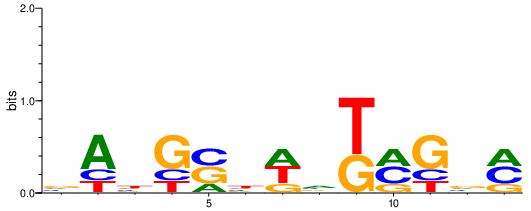

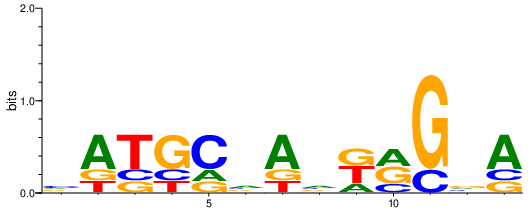

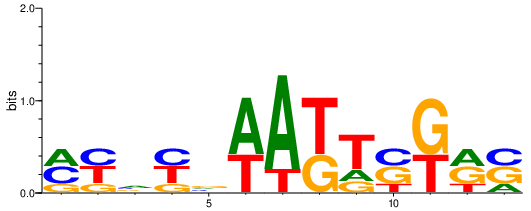

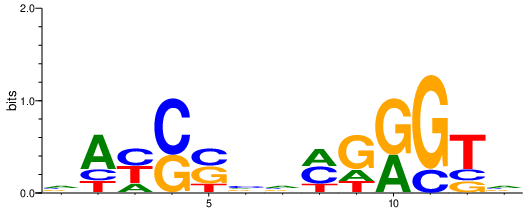

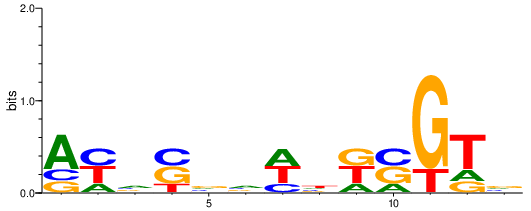

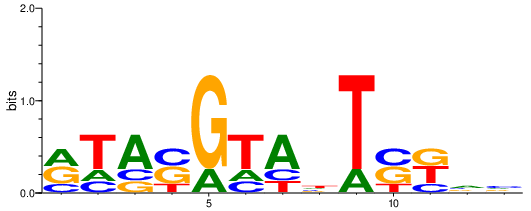

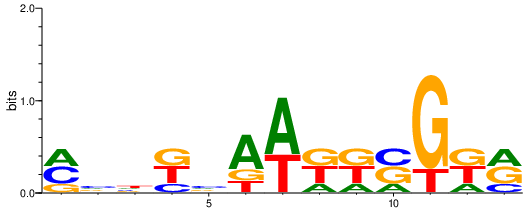

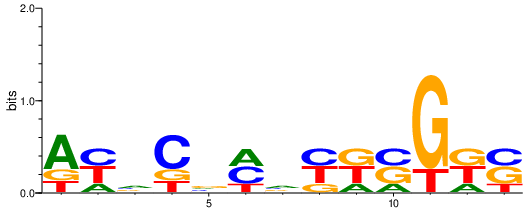

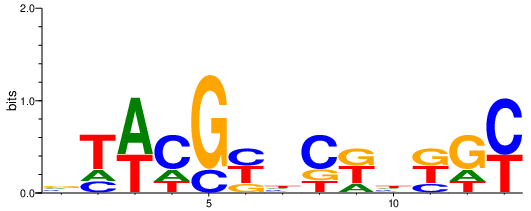

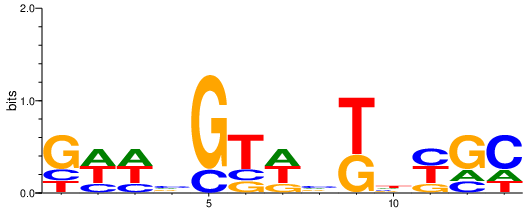

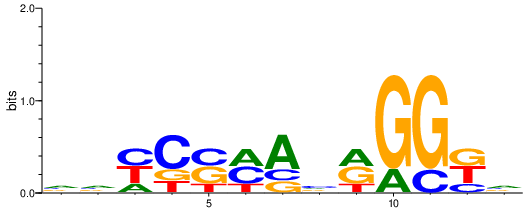

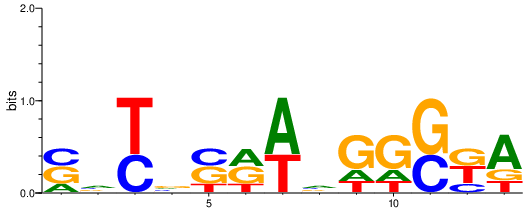

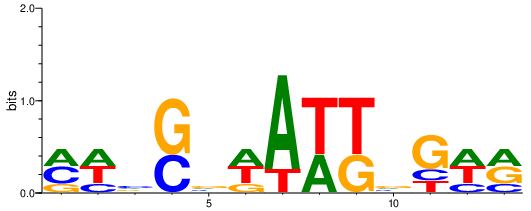

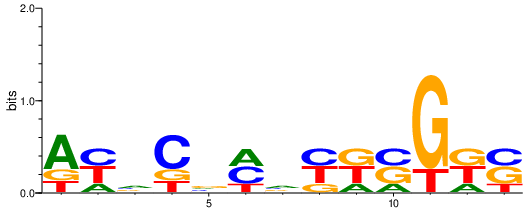

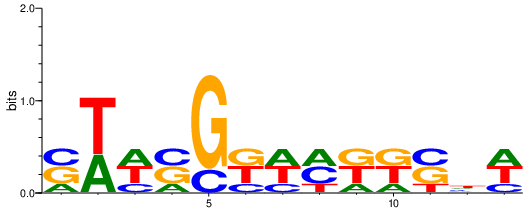

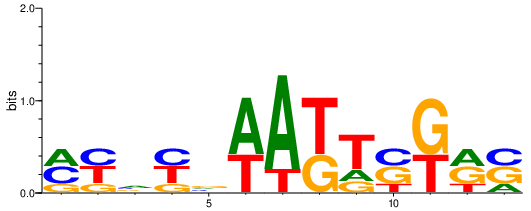

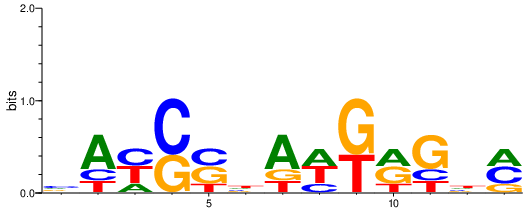

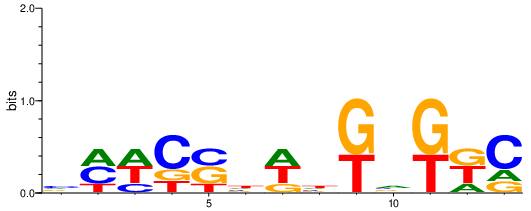

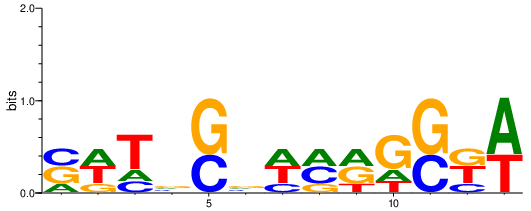

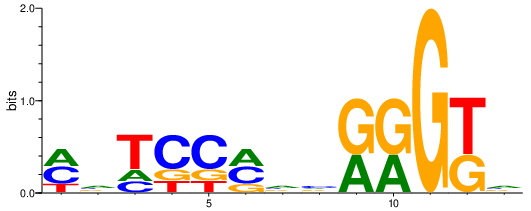

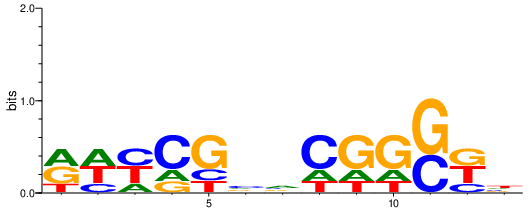

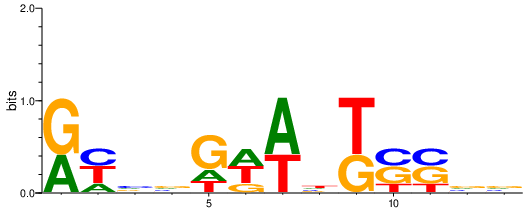

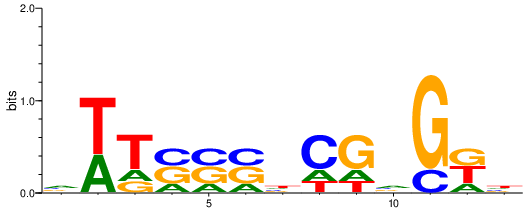

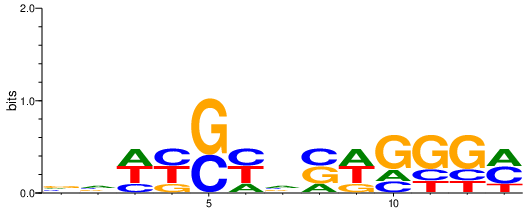

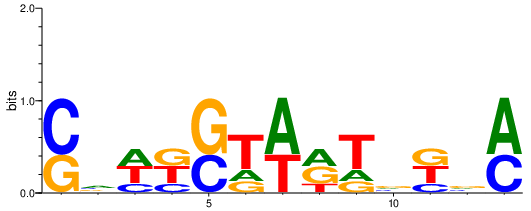

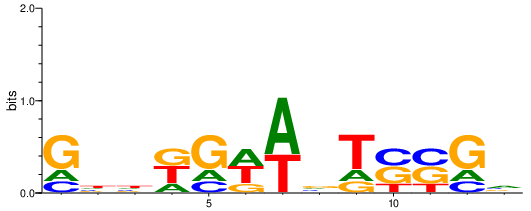

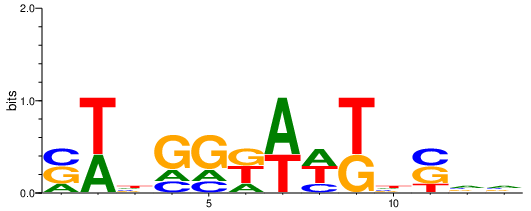

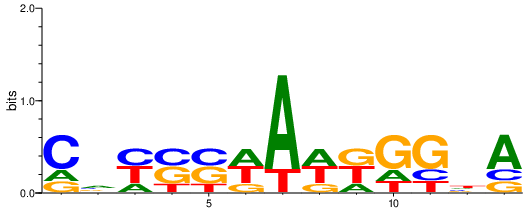

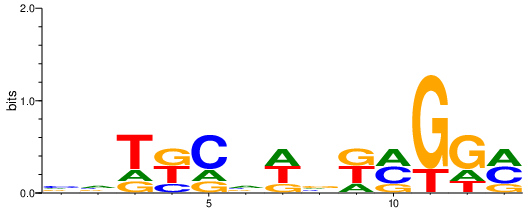

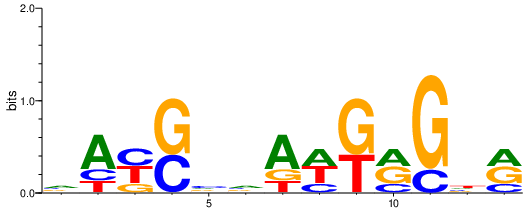

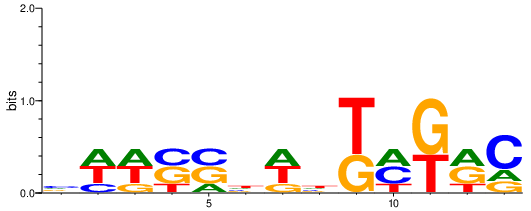

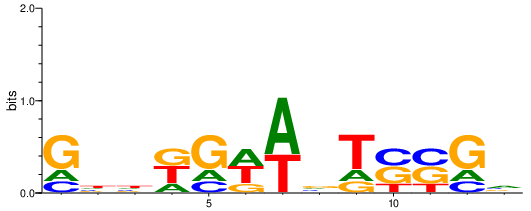

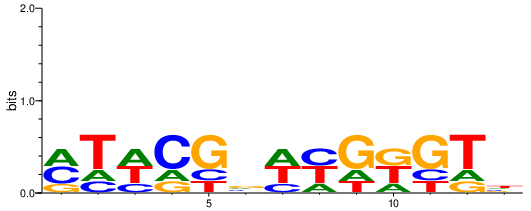

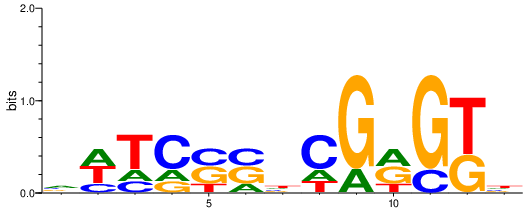

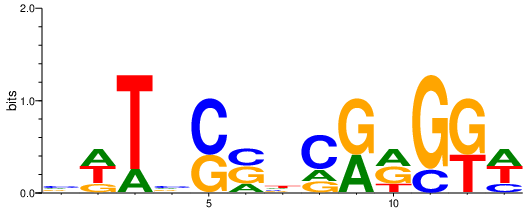

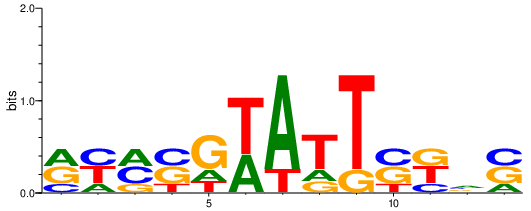

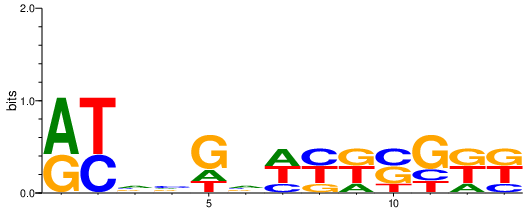

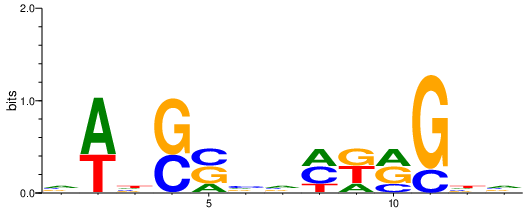

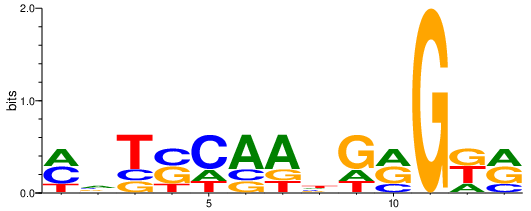

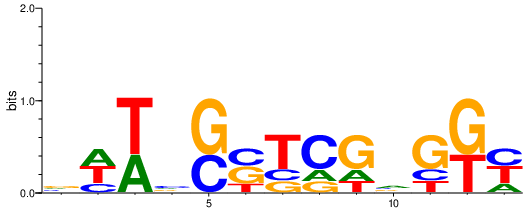

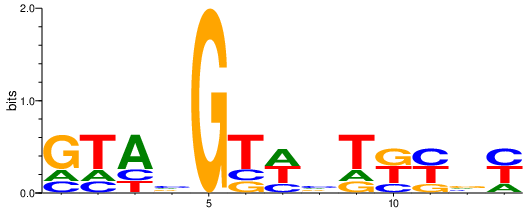

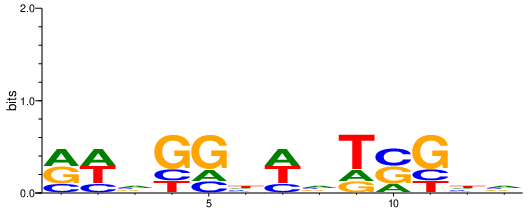

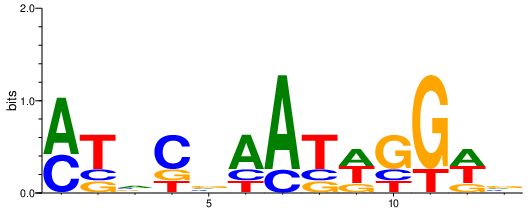

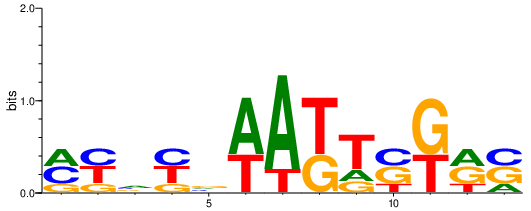

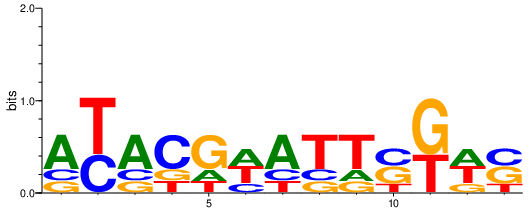

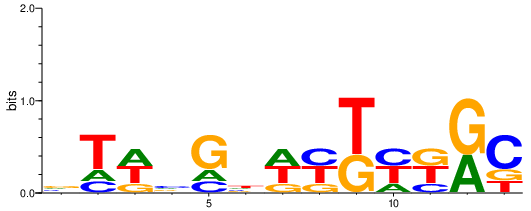

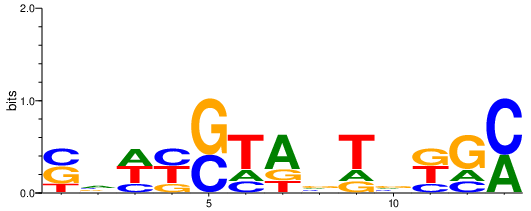

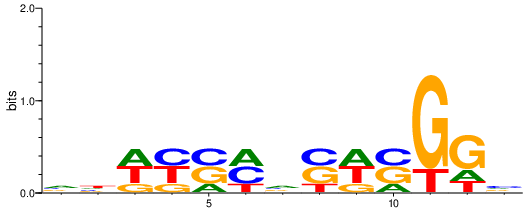

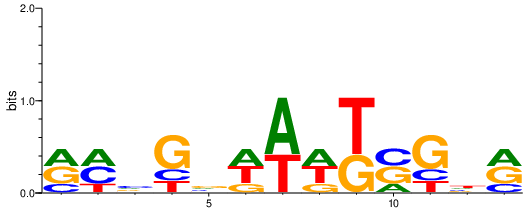

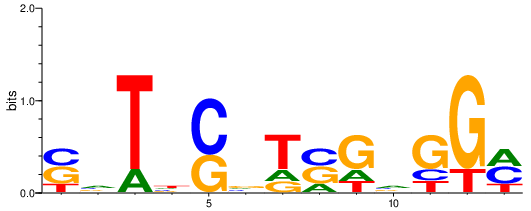

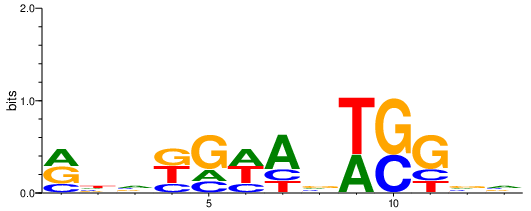

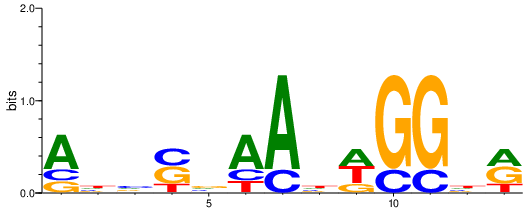

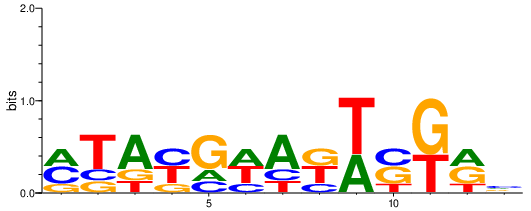

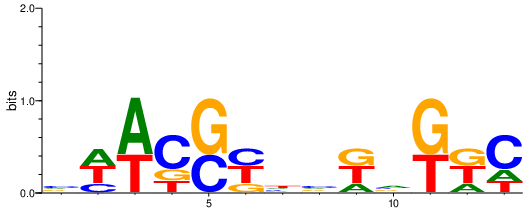

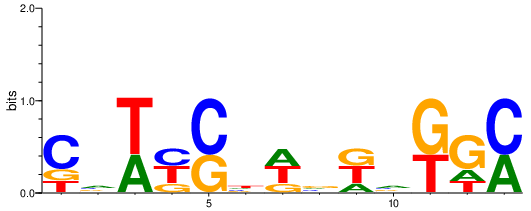

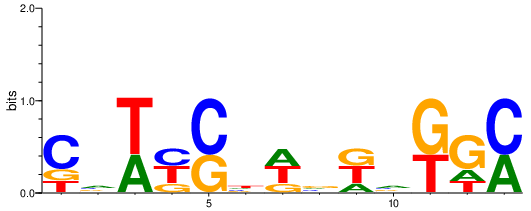

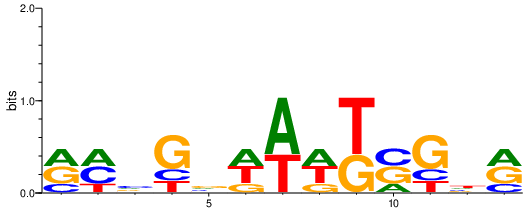

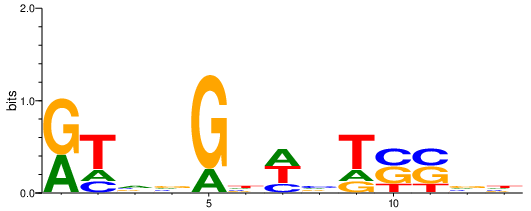

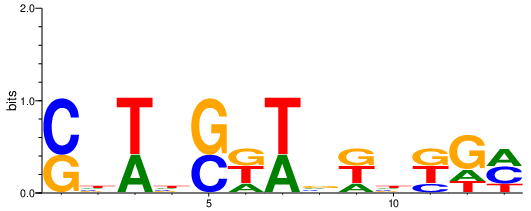

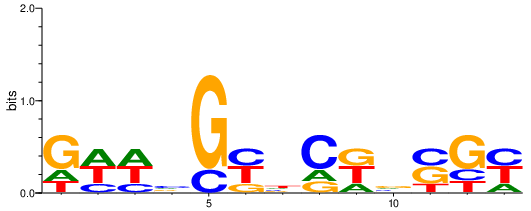

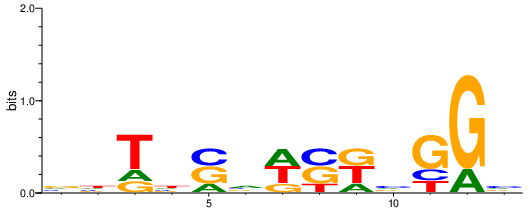

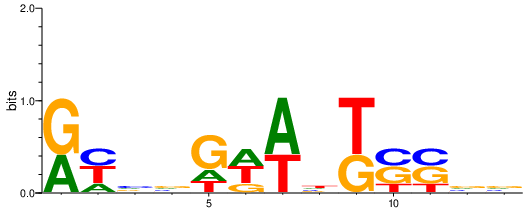

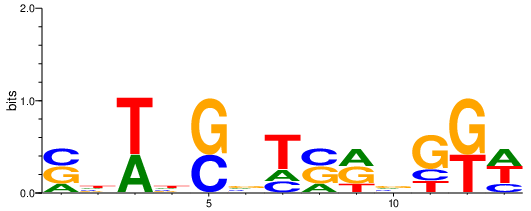

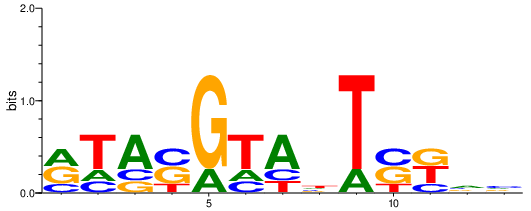

In [59]:

numbHighScores=5
PWMs=[]
sls=[]
for i in range(len(fullarray)):
    fltrMtx=np.matrix(fullarray[i])
    bi=bias[i]
    hght=fltrMtx.shape[0]
    wth=fltrMtx.shape[1]
    shapeDims=hght*wth 
    scores=[]
    for randMtx in randMtxs:
        score= convolve2d(fltrMtx,randMtx,'valid')#/shapeDims + bi
        scores.append(score.item())
    scores=pd.Series(scores)    
    highScores=scores.sort_values(ascending=False)[:numbHighScores]
    #highScoreswInd=[(hsi,highScores[hsi]) for hsi in highScores.index]
    PFM=np.matrix(np.zeros([hght,wth]))
    for hsi in highScores.index:
        PFM=PFM + randMtxs[hsi]
    PPM=seqlogo.Ppm(PFM/numbHighScores)  
    #assume equal likelihood of each base at each positions (0.25) in PPM to PWM conversion 
    with np.errstate(divide='ignore'):
        #PWM=np.log2(PPM/0.25)
        PWM=seqlogo.ppm2pwm(PPM)
        #write out next command to a file with filename of filter numb and into folder where only these imgs are
        #sl=seqlogo.seqlogo(PPM, ic_scale = True, format = 'png', size = 'medium')
    PWMs.append(PWM)
    #sls.append(sl)


            A          C          G          T
0    0.678072  -0.321928   0.678072 -31.219281
1   -0.321928  -0.321928 -31.219281   1.263034
2    1.263034  -0.321928  -0.321928 -31.219281
3  -31.219281   0.678072   0.678072  -0.321928
4   -0.321928 -31.219281   1.678072 -31.219281
5   -0.321928  -0.321928 -31.219281   1.263034
6    1.263034  -0.321928 -31.219281  -0.321928
7   -0.321928  -0.321928  -0.321928   0.678072
8   -0.321928 -31.219281 -31.219281   1.678072
9  -31.219281   0.678072   0.678072  -0.321928
10 -31.219281  -0.321928   0.678072   0.678072
11   0.678072  -0.321928  -0.321928  -0.321928
12  -0.321928   0.678072  -0.321928  -0.321928


,A,C,G,T
0,0.678072,-0.321928,0.678072,-31.219281
1,-0.321928,-0.321928,-31.219281,1.263034
2,1.263034,-0.321928,-0.321928,-31.219281
3,-31.219281,0.678072,0.678072,-0.321928
4,-0.321928,-31.219281,1.678072,-31.219281
5,-0.321928,-0.321928,-31.219281,1.263034
6,1.263034,-0.321928,-31.219281,-0.321928
7,-0.321928,-0.321928,-0.321928,0.678072
8,-0.321928,-31.219281,-31.219281,1.678072
9,-31.219281,0.678072,0.678072,-0.321928


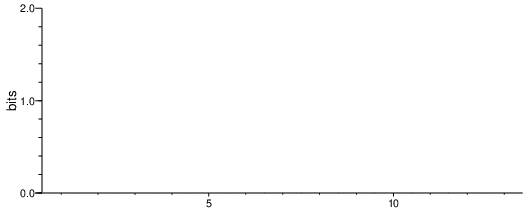

In [42]:
import weblogo
import seqlogo
#help(seqlogo)

testt=seqlogo.Ppm(PPM)
print(seqlogo.ppm2pwm(testt)) 
test=seqlogo.Pwm(PWMs[63])
print(test)
seqlogo.seqlogo(test, ic_scale = True, format = 'png', size = 'medium')
#help(weblogo.logo)

In [126]:
t=PPM
t1= seqlogo.ppm2pwm(t)
type(seqlogo.Pwm(t1,))
#plt.figure()
#z=plt.figure(seqlogo.seqlogo(t, ic_scale = True, format = 'png', size = 'medium'))
#help(z)
#seqlogo.seqlogo(t, ic_scale = True, format = 'png', size = 'medium', filename='test.png'))
#plt.savefig('test.png')
#help(seqlogo.seqlogo)
with open('seqloMatrix.txt','w+') as f2:
    f2.write(pd.DataFrame(PPM))
    f2.write("testtest")
g=0

ValueError: DataFrame constructor not properly called!

In [108]:
plt.show()

In [129]:
from keras.models import load_model
model = load_model('CuperusR/Results/Random_UTR_CNN.Hyperparam.Opt/model_weights.hdf5')
#help(model.layers[0])
t=model.layers[0].get_weights()
#model.layers[0].output_shape
t[0]

array([[[[ 3.48263234e-02, -3.82480435e-02, -1.00155519e-02, ...,
          -9.57589597e-03,  3.86509001e-02, -6.71363575e-03]],

        [[-2.09731199e-02, -2.67992634e-02,  3.57159451e-02, ...,
           2.50535589e-02,  3.36210709e-03, -1.40095281e-03]],

        [[ 2.04330832e-02, -3.09956148e-02,  2.68162806e-02, ...,
           3.53820510e-02,  1.76340733e-02, -3.38911638e-02]],

        ...,

        [[-2.34443098e-02,  1.90048963e-02, -3.36518139e-02, ...,
           3.39581519e-02, -4.29523736e-03, -3.83307748e-02]],

        [[-2.15924699e-02,  3.27553437e-03,  2.20845677e-02, ...,
           4.83393716e-03,  1.85161177e-02,  2.89916266e-02]],

        [[-1.34421000e-02, -4.50726971e-03, -1.14379320e-02, ...,
          -3.90089266e-02,  7.21466728e-03, -4.13987674e-02]]],


       [[[-2.91986261e-02, -2.66286787e-02,  2.51737633e-03, ...,
           2.23794263e-02,  1.02804520e-03, -3.45235392e-02]],

        [[ 4.05120244e-03,  1.67371687e-02,  1.10996310e-02, ...,
        

In [99]:
#print(fullarray[0])
#t[0][:,:,:,0].squeeze()
#print(t[0].shape)
#print(t[0][:,:,:,0].shape)
#print(t[0][:])
z=np.matrix([[2,3],[3,5]])+np.matrix([[1,2],[2,1]])
z/2
np.matrix(np.zeros([4,13]))

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Cycle #1
Instructions for updating:
Use tf.cast instead.
[[6.6666657e-01]
 [6.6666657e-01]
 [6.6666657e-01]
 [5.9604645e-08]]
Cycle #2
[[-7.991697e-37]
 [ 1.000000e+00]
 [ 1.000000e+00]
 [-7.991697e-37]]


52